## Import Modules

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## RNN

### Define Class

In [237]:
class RNN:
    def __init__(self, input_size, hidden_size, output_size, time_steps):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.time_steps = time_steps

        self.h0 = np.zeros((1, self.hidden_size))

        self.Wx = np.random.random((self.input_size, hidden_size))
        self.Wh = np.random.random((self.hidden_size, self.hidden_size))
        self.Wy = np.random.random((self.hidden_size, output_size))
        self.b = np.random.random(self.hidden_size)

        self.nb_output = 1
    
    def tanh(self, x):
        return np.tanh(x)

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def MSE(self, y, y_hat):
        return np.mean((y_hat-y)**2)
    
    def forward(self, h_before, input_x):
        hidden_state = tanh(h_before.dot(self.Wh)+input_x.dot(self.Wx)+self.b)
        y_hat = sigmoid(hidden_state.dot(self.Wy))
        return hidden_state, y_hat

    def predict(self, input_x):
        input_x = input_x.reshape(self.time_steps, 1)
        results = np.empty((1, 0))

        h_before = self.h0
        for time_step in range(self.time_steps):
            h_before, y_hat = self.forward(h_before, input_x[time_step])
            results = np.append(results, y_hat)
        
        return results[-1]

## Data Preprocessing

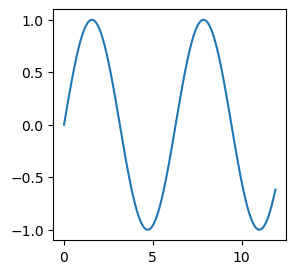

In [238]:
x = np.arange(0, 12, 0.1)
y = np.sin(x)

plt.figure(figsize=(3, 3))
plt.plot(x, y)
plt.show()

In [241]:
x_train, y_train = [], []
for i in range(len(y)):
    if i+4 > len(y): break

    cur_x = y[i:i+3]
    cur_y = y[i+3]

    x_train.append(cur_x)
    y_train.append(cur_y)

x_train = np.array(x_train)
y_train = np.array(y_train)

for i in range(10):
    print(x_train[i], y_train[i])

[0.         0.09983342 0.19866933] 0.2955202066613396
[0.09983342 0.19866933 0.29552021] 0.3894183423086505
[0.19866933 0.29552021 0.38941834] 0.479425538604203
[0.29552021 0.38941834 0.47942554] 0.5646424733950355
[0.38941834 0.47942554 0.56464247] 0.6442176872376911
[0.47942554 0.56464247 0.64421769] 0.7173560908995228
[0.56464247 0.64421769 0.71735609] 0.7833269096274834
[0.64421769 0.71735609 0.78332691] 0.8414709848078965
[0.71735609 0.78332691 0.84147098] 0.8912073600614354
[0.78332691 0.84147098 0.89120736] 0.9320390859672264


## Test

In [264]:
input_size = 1
hidden_size = 4
output_size = 1
time_steps = 3

rnn = RNN(input_size, hidden_size, output_size, time_steps)

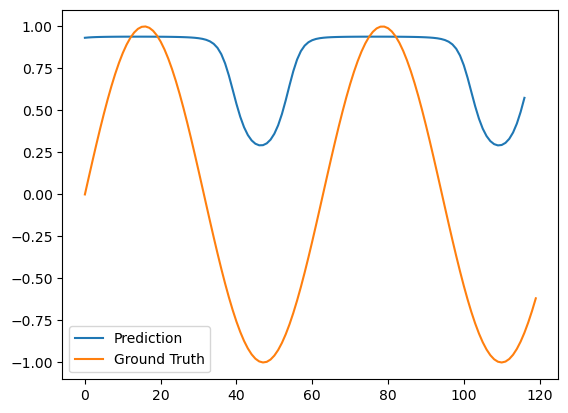

In [265]:
history = []
for x in x_train:
    history.append(rnn.predict(x))

plt.figure()
plt.plot(history, label='Prediction')
plt.plot(y, label='Ground Truth')
plt.legend()
plt.show()